In [ ]:
import pandas as pd
import pickle
import seaborn as sns
sns.set()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as pyoff
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from sklearn.manifold._t_sne import _joint_probabilities
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
from sklearn.decomposition import PCA

In [ ]:
def read_file_sequence(path):
    
    file_dict = pd.read_pickle(path)
    df = pd.DataFrame(file_dict.items(),columns=['Name','Feature_Value'])
    return df
    
def read_file(path):
    
    file_dict = pd.read_pickle(path)
    df = pd.DataFrame(file_dict.items(),columns=['Name','Feature_Value'])
    columns = []
    for i in range(1024):
        columns = columns + [str(i)]
    df_final = pd.DataFrame(df['Feature_Value'].to_list(),columns = columns)
    df_final['Name'] = df['Name']
  
    return df_final

def dataset_labels(csv_file_path):

    labels_df = pd.read_csv(csv_file_path)
    labels_df = labels_df.dropna()
    labels_df.astype(int)
    labels_dict = {}
    files_list = labels_df['Sample ID'].to_list()
    grade = labels_df['Sample Grade'].to_list()

    for i in range(len(files_list)):
        labels_dict[int(files_list[i])] = int(grade[i])
    
    return labels_dict

In [ ]:
df = read_file('/content/drive/MyDrive/MITACS/FineTuned_Model_Features_dict.pickle')
labels_dict = dataset_labels('/content/drive/MyDrive/MITACS/Data.csv')

In [ ]:
df = read_file_sequence('/content/drive/MyDrive/MITACS/FineTuned_Model_Features_dict.pickle')

In [ ]:
file_names = df['Name'].to_list()

In [ ]:
print(file_names[0])

Sample 362.vsi - 20x [x=33000,y=31000,w=1000,h=1000].png


In [ ]:
((file_names[0]).split(' ')[1]).split('.')[0]

'362'

In [ ]:
seq_list = []
for name in file_names:

    if ((name).split(' ')[1]).split('.')[0] == '632':
        seq_list = seq_list + [name]

In [ ]:
print(len(seq_list))

500


In [ ]:
print(len(df['Name'].to_list()))

98000


In [ ]:
df['Grade'] = ""
i = 0
list_Temp = df['Name'].to_list()
label_list = []
print(list_Temp[100])
for patch in list_Temp:
    label = labels_dict[int(((patch).split(' ')[1]).split('.')[0])]
    label_list = label_list + [label]
    print(len(label_list))

In [ ]:
df['Grade'] = label_list

In [ ]:
X = []
for i in range(98000):
    
    X = X + [((df.iloc[i]).values.flatten().tolist())[:1024]]

    print(len(X))

In [ ]:
tsne = TSNE()
X_embedded = tsne.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



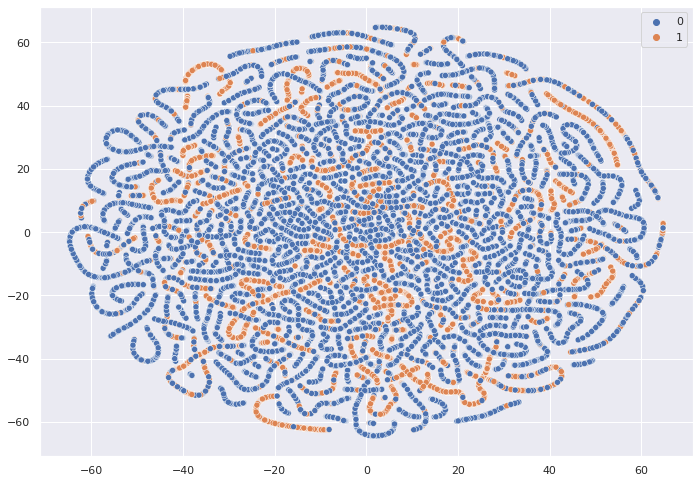

In [ ]:
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=label_list, legend='full')

In [ ]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [ ]:
feat_cols = [str(i) for i in range(1024)]
print(feat_cols)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '15

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.92626787 0.04485811 0.02028938]


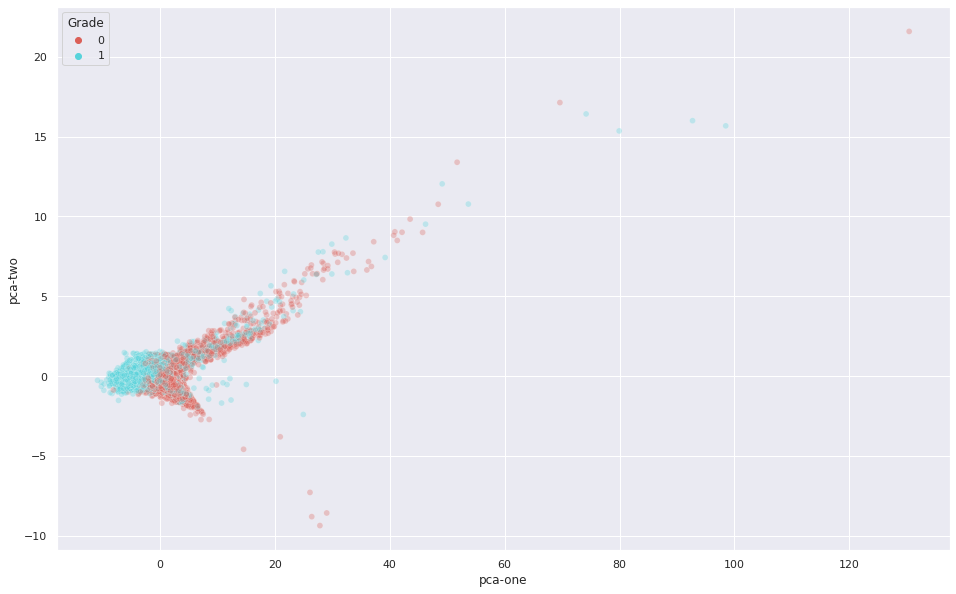

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Grade",
    palette=sns.color_palette("hls", 2),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

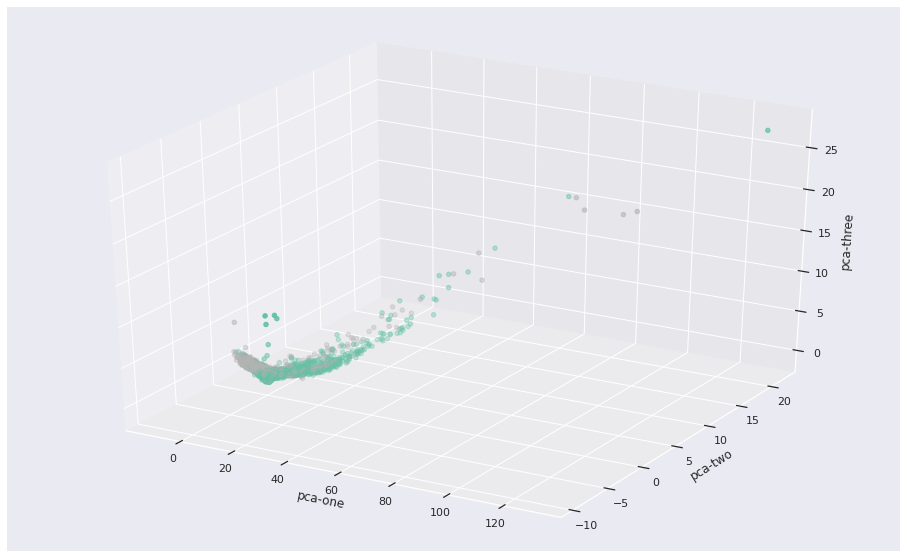

In [ ]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["Grade"], 
    cmap='Set2'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [ ]:
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]

In [ ]:
import time

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.009s...
[t-SNE] Computed neighbors for 10000 samples in 3.171s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.085052
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.061211
[t-SNE] KL divergence after 300 iterations: 2.189859
t-SNE done! Time elapsed:

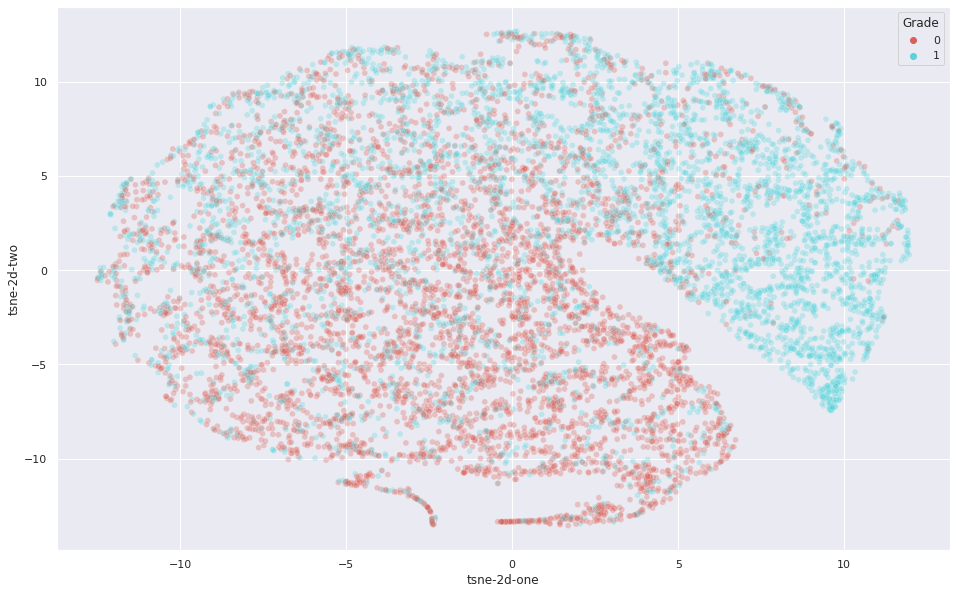

In [ ]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Grade",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3
)

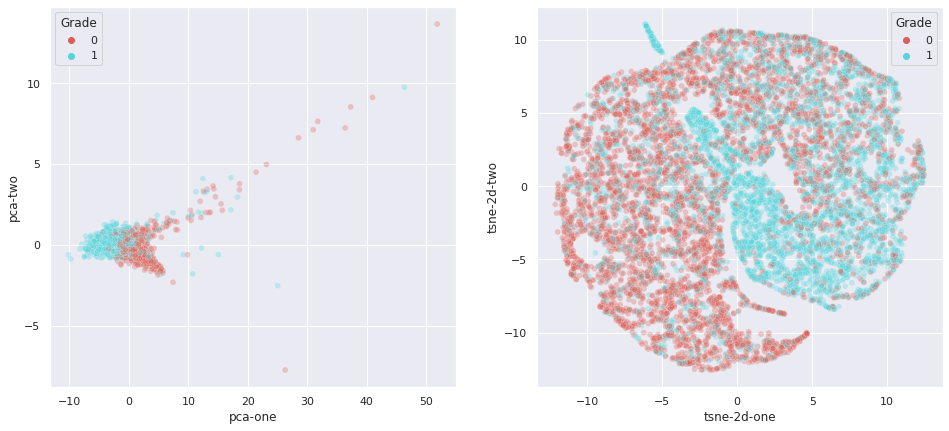

In [ ]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Grade",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Grade",
    palette=sns.color_palette("hls",2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [ ]:
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values

In [ ]:
pca_10 = PCA(n_components=10)
pca_result_10 = pca_10.fit_transform(data_subset)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_10.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.999293863773346


In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_10)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



t-SNE done! Time elapsed: 16.30262017250061 seconds


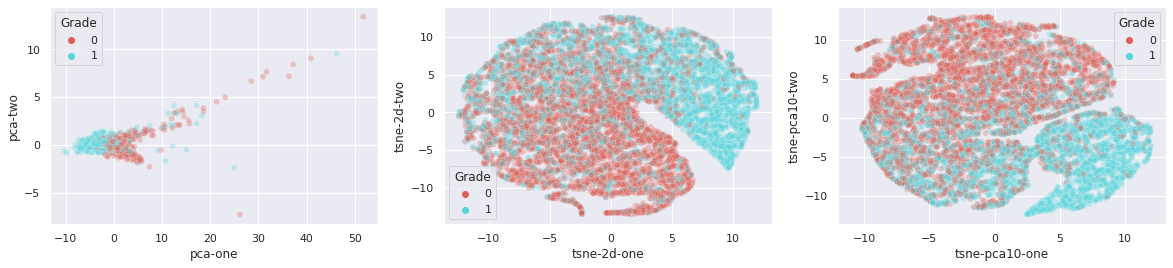

In [ ]:
df_subset['tsne-pca10-one'] = tsne_pca_results[:,0]
df_subset['tsne-pca10-two'] = tsne_pca_results[:,1]
plt.figure(figsize=(20,4))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="Grade",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Grade",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca10-one", y="tsne-pca10-two",
    hue="Grade",
    palette=sns.color_palette("hls", 2),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax3
)

Clustering Patches on the basis of Fine Tuned Image Features

In [ ]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle
import json
import matplotlib.backends.backend_pdf
import shutil

In [ ]:
file_dict = pd.read_pickle('/content/drive/MyDrive/MITACS/FineTuned_Model_Features_dict.pickle')
df = pd.DataFrame(file_dict.items(),columns=['Name','Feature_Value'])
slide_data = {}
patch_list = df['Name'].to_list()
# print(patch_list[0])
feature_list = df['Feature_Value'].to_list()

In [ ]:
pca = PCA(n_components=10,random_state=23)
pca.fit(feature_list)
values_transformed = pca.transform(feature_list)

kmeans = KMeans(n_clusters=9)
kmeans.fit(values_transformed)

KMeans(n_clusters=9)

In [ ]:
 data_frame = pd.DataFrame(patch_list,columns = ['filename'])
data_frame['Cluster'] = kmeans.labels_


In [ ]:
data_frame.to_csv('/content/drive/MyDrive/MITACS/test_clusters.csv')

In [ ]:
print(data_frame)

                                                filename  Cluster
0      Sample 362.vsi - 20x [x=33000,y=31000,w=1000,h...        0
1      Sample 362.vsi - 20x [x=42000,y=6000,w=1000,h=...        4
2      Sample 362.vsi - 20x [x=19000,y=46000,w=1000,h...        0
3      Sample 362.vsi - 20x [x=8000,y=44000,w=1000,h=...        0
4      Sample 362.vsi - 20x [x=27000,y=11000,w=1000,h...        0
...                                                  ...      ...
97995  Sample 27.vsi - 20x [x=75000,y=49000,w=1000,h=...        8
97996  Sample 27.vsi - 20x [x=25000,y=61000,w=1000,h=...        5
97997  Sample 27.vsi - 20x [x=16000,y=43000,w=1000,h=...        5
97998  Sample 27.vsi - 20x [x=77000,y=41000,w=1000,h=...        5
97999  Sample 27.vsi - 20x [x=32000,y=40000,w=1000,h=...        3

[98000 rows x 2 columns]


In [ ]:
clusters = {}
for file,cluster in zip(patch_list,kmeans.labels_):
    if cluster not in clusters.keys():
        clusters[cluster] = []
        clusters[cluster].append(file)
    else:
        clusters[cluster].append(file)

In [ ]:
print(clusters[0])

['Sample 362.vsi - 20x [x=33000,y=31000,w=1000,h=1000].png', 'Sample 362.vsi - 20x [x=19000,y=46000,w=1000,h=1000].png', 'Sample 362.vsi - 20x [x=8000,y=44000,w=1000,h=1000].png', 'Sample 362.vsi - 20x [x=27000,y=11000,w=1000,h=1000].png', 'Sample 362.vsi - 20x [x=20000,y=57000,w=1000,h=1000].png', 'Sample 362.vsi - 20x [x=13000,y=53000,w=1000,h=1000].png', 'Sample 362.vsi - 20x [x=51000,y=5000,w=1000,h=1000].png', 'Sample 362.vsi - 20x [x=22000,y=45000,w=1000,h=1000].png', 'Sample 362.vsi - 20x [x=19000,y=32000,w=1000,h=1000].png', 'Sample 362.vsi - 20x [x=19000,y=52000,w=1000,h=1000].png', 'Sample 362.vsi - 20x [x=28000,y=8000,w=1000,h=1000].png', 'Sample 362.vsi - 20x [x=16000,y=50000,w=1000,h=1000].png', 'Sample 362.vsi - 20x [x=18000,y=27000,w=1000,h=1000].png', 'Sample 362.vsi - 20x [x=43000,y=4000,w=1000,h=1000].png', 'Sample 362.vsi - 20x [x=9000,y=43000,w=1000,h=1000].png', 'Sample 362.vsi - 20x [x=8000,y=45000,w=1000,h=1000].png', 'Sample 362.vsi - 20x [x=48000,y=15000,w=1000